# Breast Cancer Classification

**Breast cancer wisconsin (diagnostic) dataset**

* Exploratory data analysis with numpy and pandas
* Classification with Keras API for TF 2.0
* Creating DNN with Sequential keras model
* Adding Dropout layer
* Adding many epochs and watch overfitting
* For model optimization, Adding Early Stopping for prevention of overfitting

# import necessary library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Load Dataset
Data source: 
UCI ML Breast Cancer Wisconsin (Diagnostic) datasets. https://goo.gl/U2Uwz2

In [2]:
cancer_data = pd.read_csv('DATA/cancer_classification.csv')

In [3]:
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [4]:
cancer_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [5]:
cancer_data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


# Exploratory data analysis

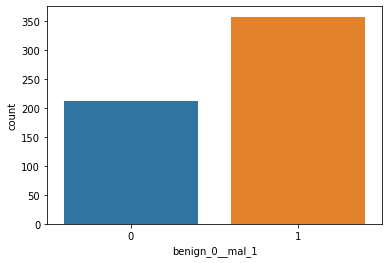

In [6]:
sns.countplot(x='benign_0__mal_1', data=cancer_data)

# Checking the correlation and plot

In [7]:
cancer_data.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


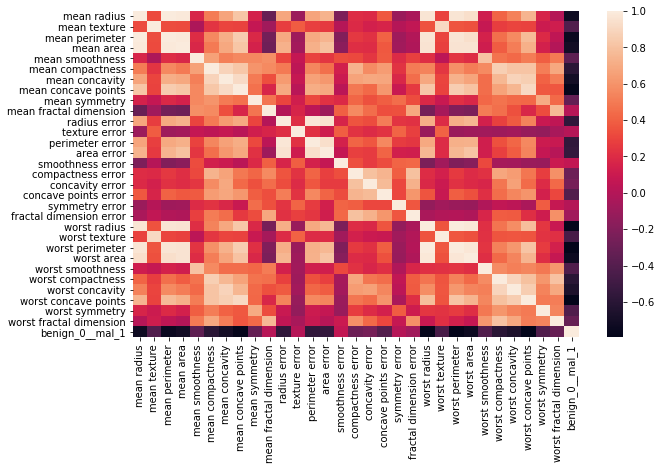

In [8]:
plt.figure(figsize=(10,6))
sns.heatmap(data=cancer_data.corr())

In [9]:
cancer_data.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

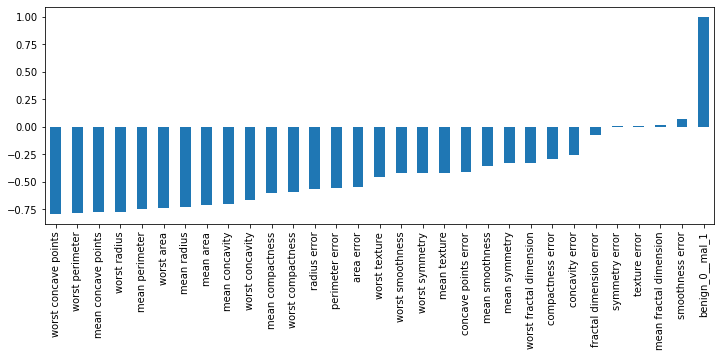

In [10]:
plt.figure(figsize=(12,4))
cancer_data.corr()['benign_0__mal_1'].sort_values().plot(kind='bar')

In [11]:
plt.figure(figsize=(12,4))
cancer_data.corr()['benign_0__mal_1'][:-1].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

<Figure size 864x288 with 0 Axes>

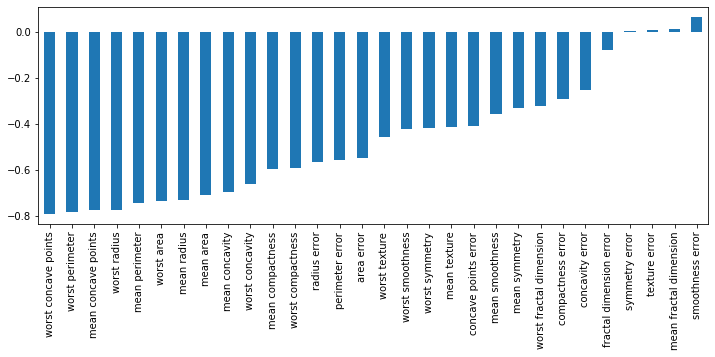

In [12]:
plt.figure(figsize=(12,4))
cancer_data.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

# Train test split

In [13]:
X = cancer_data.drop('benign_0__mal_1', axis=1).values
y = cancer_data['benign_0__mal_1'].values

In [14]:
from sklearn.model_selection import train_test_split


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

# Scaling Data

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
scaler = MinMaxScaler()

In [18]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [19]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Creating the Model

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [21]:
print(X_train.shape)
print(X_test.shape)

(398, 30)
(171, 30)


# Make Neural Network Stucture

In [22]:
model = Sequential()

In [23]:
model.add(Dense(units = 30, activation= 'relu'))

model.add(Dense(units = 15, activation= 'relu'))

model.add(Dense(units = 1, activation= 'sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam')

## Training the Model 

### Choosing too many epochs and overfitting

In [24]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1
          )

Train on 398 samples, validate on 171 samples
Epoch 1/600
398/398 [==============================] - 9s 22ms/sample - loss: 0.6302 - val_loss: 0.6041
Epoch 2/600
398/398 [==============================] - 0s 173us/sample - loss: 0.5811 - val_loss: 0.5643
Epoch 3/600
398/398 [==============================] - 0s 95us/sample - loss: 0.5393 - val_loss: 0.5236
Epoch 4/600
398/398 [==============================] - 0s 105us/sample - loss: 0.4964 - val_loss: 0.4836
Epoch 5/600
398/398 [==============================] - 0s 103us/sample - loss: 0.4560 - val_loss: 0.4438
Epoch 6/600
398/398 [==============================] - 0s 98us/sample - loss: 0.4158 - val_loss: 0.4032
Epoch 7/600
398/398 [==============================] - 0s 92us/sample - loss: 0.3767 - val_loss: 0.3690
Epoch 8/600
398/398 [==============================] - 0s 98us/sample - loss: 0.3440 - val_loss: 0.3357
Epoch 9/600
398/398 [==============================] - 0s 69us/sample - loss: 0.3150 - val_loss: 0.3079
Epoch 10/600
39

398/398 [==============================] - 0s 100us/sample - loss: 0.0455 - val_loss: 0.1275
Epoch 79/600
398/398 [==============================] - 0s 102us/sample - loss: 0.0429 - val_loss: 0.1258
Epoch 80/600
398/398 [==============================] - 0s 90us/sample - loss: 0.0423 - val_loss: 0.1272
Epoch 81/600
398/398 [==============================] - 0s 103us/sample - loss: 0.0425 - val_loss: 0.1273
Epoch 82/600
398/398 [==============================] - 0s 100us/sample - loss: 0.0426 - val_loss: 0.1284
Epoch 83/600
398/398 [==============================] - 0s 95us/sample - loss: 0.0422 - val_loss: 0.1278
Epoch 84/600
398/398 [==============================] - 0s 98us/sample - loss: 0.0404 - val_loss: 0.1263
Epoch 85/600
398/398 [==============================] - 0s 98us/sample - loss: 0.0441 - val_loss: 0.1280
Epoch 86/600
398/398 [==============================] - 0s 95us/sample - loss: 0.0405 - val_loss: 0.1267
Epoch 87/600
398/398 [==============================] - 0s 108us

398/398 [==============================] - 0s 97us/sample - loss: 0.0315 - val_loss: 0.1450
Epoch 156/600
398/398 [==============================] - 0s 98us/sample - loss: 0.0315 - val_loss: 0.1439
Epoch 157/600
398/398 [==============================] - 0s 100us/sample - loss: 0.0285 - val_loss: 0.1461
Epoch 158/600
398/398 [==============================] - 0s 98us/sample - loss: 0.0304 - val_loss: 0.1483
Epoch 159/600
398/398 [==============================] - 0s 95us/sample - loss: 0.0291 - val_loss: 0.1477
Epoch 160/600
398/398 [==============================] - 0s 97us/sample - loss: 0.0291 - val_loss: 0.1471
Epoch 161/600
398/398 [==============================] - 0s 95us/sample - loss: 0.0303 - val_loss: 0.1492
Epoch 162/600
398/398 [==============================] - 0s 100us/sample - loss: 0.0287 - val_loss: 0.1462
Epoch 163/600
398/398 [==============================] - 0s 175us/sample - loss: 0.0283 - val_loss: 0.1480
Epoch 164/600
398/398 [==============================] - 

398/398 [==============================] - 0s 100us/sample - loss: 0.0212 - val_loss: 0.1734
Epoch 233/600
398/398 [==============================] - 0s 97us/sample - loss: 0.0217 - val_loss: 0.1777
Epoch 234/600
398/398 [==============================] - 0s 95us/sample - loss: 0.0249 - val_loss: 0.1748
Epoch 235/600
398/398 [==============================] - 0s 99us/sample - loss: 0.0241 - val_loss: 0.1785
Epoch 236/600
398/398 [==============================] - 0s 100us/sample - loss: 0.0216 - val_loss: 0.1788
Epoch 237/600
398/398 [==============================] - 0s 96us/sample - loss: 0.0214 - val_loss: 0.1794
Epoch 238/600
398/398 [==============================] - 0s 93us/sample - loss: 0.0209 - val_loss: 0.1812
Epoch 239/600
398/398 [==============================] - 0s 105us/sample - loss: 0.0213 - val_loss: 0.1827
Epoch 240/600
398/398 [==============================] - 0s 103us/sample - loss: 0.0210 - val_loss: 0.1811
Epoch 241/600
398/398 [==============================] -

398/398 [==============================] - 0s 100us/sample - loss: 0.0148 - val_loss: 0.2279
Epoch 310/600
398/398 [==============================] - 0s 94us/sample - loss: 0.0181 - val_loss: 0.2294
Epoch 311/600
398/398 [==============================] - 0s 98us/sample - loss: 0.0177 - val_loss: 0.2267
Epoch 312/600
398/398 [==============================] - 0s 99us/sample - loss: 0.0145 - val_loss: 0.2317
Epoch 313/600
398/398 [==============================] - 0s 95us/sample - loss: 0.0149 - val_loss: 0.2328
Epoch 314/600
398/398 [==============================] - 0s 98us/sample - loss: 0.0159 - val_loss: 0.2337
Epoch 315/600
398/398 [==============================] - 0s 100us/sample - loss: 0.0151 - val_loss: 0.2337
Epoch 316/600
398/398 [==============================] - 0s 95us/sample - loss: 0.0141 - val_loss: 0.2334
Epoch 317/600
398/398 [==============================] - 0s 99us/sample - loss: 0.0142 - val_loss: 0.2317
Epoch 318/600
398/398 [==============================] - 0

398/398 [==============================] - 0s 105us/sample - loss: 0.0099 - val_loss: 0.2923
Epoch 387/600
398/398 [==============================] - 0s 108us/sample - loss: 0.0108 - val_loss: 0.2911
Epoch 388/600
398/398 [==============================] - 0s 120us/sample - loss: 0.0106 - val_loss: 0.2967
Epoch 389/600
398/398 [==============================] - 0s 105us/sample - loss: 0.0117 - val_loss: 0.3001
Epoch 390/600
398/398 [==============================] - 0s 98us/sample - loss: 0.0118 - val_loss: 0.3012
Epoch 391/600
398/398 [==============================] - 0s 95us/sample - loss: 0.0163 - val_loss: 0.2976
Epoch 392/600
398/398 [==============================] - 0s 98us/sample - loss: 0.0117 - val_loss: 0.2986
Epoch 393/600
398/398 [==============================] - 0s 95us/sample - loss: 0.0097 - val_loss: 0.3044
Epoch 394/600
398/398 [==============================] - 0s 93us/sample - loss: 0.0093 - val_loss: 0.3029
Epoch 395/600
398/398 [==============================] -

398/398 [==============================] - 0s 105us/sample - loss: 0.0071 - val_loss: 0.3613
Epoch 463/600
398/398 [==============================] - 0s 100us/sample - loss: 0.0068 - val_loss: 0.3553
Epoch 464/600
398/398 [==============================] - 0s 100us/sample - loss: 0.0065 - val_loss: 0.3582
Epoch 465/600
398/398 [==============================] - 0s 110us/sample - loss: 0.0063 - val_loss: 0.3629
Epoch 466/600
398/398 [==============================] - 0s 100us/sample - loss: 0.0068 - val_loss: 0.3627
Epoch 467/600
398/398 [==============================] - 0s 113us/sample - loss: 0.0067 - val_loss: 0.3642
Epoch 468/600
398/398 [==============================] - 0s 102us/sample - loss: 0.0081 - val_loss: 0.3643
Epoch 469/600
398/398 [==============================] - 0s 93us/sample - loss: 0.0087 - val_loss: 0.3682
Epoch 470/600
398/398 [==============================] - 0s 98us/sample - loss: 0.0091 - val_loss: 0.3595
Epoch 471/600
398/398 [==============================

398/398 [==============================] - 0s 100us/sample - loss: 0.0038 - val_loss: 0.4330
Epoch 539/600
398/398 [==============================] - 0s 100us/sample - loss: 0.0050 - val_loss: 0.4236
Epoch 540/600
398/398 [==============================] - 0s 115us/sample - loss: 0.0037 - val_loss: 0.4354
Epoch 541/600
398/398 [==============================] - 0s 125us/sample - loss: 0.0036 - val_loss: 0.4349
Epoch 542/600
398/398 [==============================] - 0s 117us/sample - loss: 0.0048 - val_loss: 0.4398
Epoch 543/600
398/398 [==============================] - 0s 103us/sample - loss: 0.0036 - val_loss: 0.4364
Epoch 544/600
398/398 [==============================] - 0s 113us/sample - loss: 0.0036 - val_loss: 0.4335
Epoch 545/600
398/398 [==============================] - 0s 103us/sample - loss: 0.0042 - val_loss: 0.4409
Epoch 546/600
398/398 [==============================] - 0s 98us/sample - loss: 0.0035 - val_loss: 0.4394
Epoch 547/600
398/398 [=============================

# Watch the rate of loss or overfitting

In [25]:
model_loss = pd.DataFrame(model.history.history)

In [26]:
model_loss.head()

,loss,val_loss
0,0.630228,0.604141
1,0.581149,0.564331
2,0.539301,0.523576
3,0.496403,0.483588
4,0.456029,0.443805


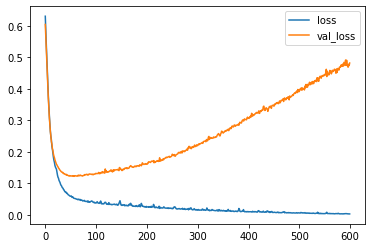

In [27]:
model_loss.plot()

# Adding Early Stopping for prevention of overfitting

In [28]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [29]:
from tensorflow.keras.callbacks import EarlyStopping

In [30]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [31]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Train on 398 samples, validate on 171 samples
Epoch 1/600
398/398 [==============================] - 1s 1ms/sample - loss: 0.6833 - val_loss: 0.6714
Epoch 2/600
398/398 [==============================] - 0s 115us/sample - loss: 0.6597 - val_loss: 0.6497
Epoch 3/600
398/398 [==============================] - 0s 123us/sample - loss: 0.6345 - val_loss: 0.6241
Epoch 4/600
398/398 [==============================] - 0s 128us/sample - loss: 0.6046 - val_loss: 0.5924
Epoch 5/600
398/398 [==============================] - 0s 120us/sample - loss: 0.5671 - val_loss: 0.5525
Epoch 6/600
398/398 [==============================] - 0s 120us/sample - loss: 0.5232 - val_loss: 0.5084
Epoch 7/600
398/398 [==============================] - 0s 123us/sample - loss: 0.4782 - val_loss: 0.4643
Epoch 8/600
398/398 [==============================] - 0s 123us/sample - loss: 0.4345 - val_loss: 0.4227
Epoch 9/600
398/398 [==============================] - 0s 118us/sample - loss: 0.3926 - val_loss: 0.3864
Epoch 10/60

398/398 [==============================] - 0s 100us/sample - loss: 0.0428 - val_loss: 0.1405
Epoch 00078: early stopping


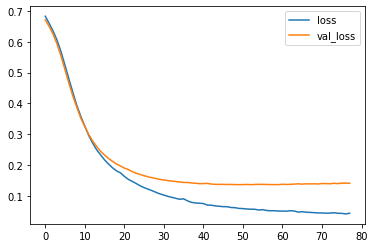

In [32]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

# Adding in DropOut Layers

In [33]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [34]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Train on 398 samples, validate on 171 samples
Epoch 1/600
398/398 [==============================] - 1s 2ms/sample - loss: 0.7073 - val_loss: 0.6692
Epoch 2/600
398/398 [==============================] - 0s 127us/sample - loss: 0.6917 - val_loss: 0.6545
Epoch 3/600
398/398 [==============================] - 0s 125us/sample - loss: 0.6660 - val_loss: 0.6398
Epoch 4/600
398/398 [==============================] - 0s 118us/sample - loss: 0.6498 - val_loss: 0.6205
Epoch 5/600
398/398 [==============================] - 0s 118us/sample - loss: 0.6372 - val_loss: 0.5997
Epoch 6/600
398/398 [==============================] - 0s 113us/sample - loss: 0.6120 - val_loss: 0.5812
Epoch 7/600
398/398 [==============================] - 0s 105us/sample - loss: 0.5910 - val_loss: 0.5569
Epoch 8/600
398/398 [==============================] - 0s 108us/sample - loss: 0.5646 - val_loss: 0.5343
Epoch 9/600
398/398 [==============================] - 0s 118us/sample - loss: 0.5536 - val_loss: 0.5037
Epoch 10/60

Epoch 78/600
398/398 [==============================] - 0s 115us/sample - loss: 0.1105 - val_loss: 0.1224
Epoch 79/600
398/398 [==============================] - 0s 128us/sample - loss: 0.1375 - val_loss: 0.1194
Epoch 80/600
398/398 [==============================] - 0s 125us/sample - loss: 0.1278 - val_loss: 0.1143
Epoch 81/600
398/398 [==============================] - 0s 135us/sample - loss: 0.1156 - val_loss: 0.1107
Epoch 82/600
398/398 [==============================] - 0s 115us/sample - loss: 0.0946 - val_loss: 0.1218
Epoch 83/600
398/398 [==============================] - 0s 130us/sample - loss: 0.1124 - val_loss: 0.1128
Epoch 84/600
398/398 [==============================] - 0s 110us/sample - loss: 0.0948 - val_loss: 0.1102
Epoch 85/600
398/398 [==============================] - 0s 158us/sample - loss: 0.1152 - val_loss: 0.1236
Epoch 86/600
398/398 [==============================] - 0s 130us/sample - loss: 0.1114 - val_loss: 0.1105
Epoch 87/600
398/398 [========================

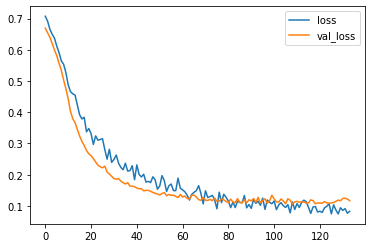

In [35]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

# Model Evaluation

In [37]:
predictions = model.predict_classes(X_test)
from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[ 64   2]
 [  3 102]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.96        66
           1       0.98      0.97      0.98       105

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171

